### <p style="text-align: right;"> &#9989; Andrew Koren</p>

# PHY480 Day 4

## In-class assignment: Root finding


In [1]:
import numpy as np


## Bisection method

To find a root of $f(x)=0$ with a zeroth order method (i.e. the one that requires only function evaluations), namely, _bisection method_, we need two steps. First, find such interval $[a,b]$ that $f(a)$ and $f(b)$ have opposite signs. Assuming the function is smooth it means that there is at least one root within the interval. This process is called _bracketing_. Then, starting from $[a,b]$, choose a midpoint $c$ and then choose left or right interval maintaining that the function values at the endpoints have opposite signs. Once the interval shrinks below predefined tolerance, stop the search.

The function below illustrates a simple bracketing algorithm which requires a starting point $x_0$ and a search direction -- to the right or to the left.

In [2]:
# function to bracket a root
# Input:
# fun -- function f(x)
# x0 -- starting point for bracketing
# step -- initial step size which is doubled at every step
# search_to_the_right -- if True, bracketing in the positive direction, otherwise - negative direction
# max_iter -- maximum number of iterations
# Output:
# status -- =0, if bracketing was successful
# i -- number of iterations it took
# [xa,xb] -- bracketing interval
def root_bracket( fun, x0=0, step=0.01, search_to_the_right=True, max_iter=100 ):

    # initialization
    f0 = fun( x0 )
    x = x0
    fx = f0
    if search_to_the_right:
        h = step
    else:
        h = -step

    # iterate until we find opposite signs at the endpoints
    i = 0
    while f0*fx >=0 and i < max_iter:
        
        x += h
            
        fx = fun(x)

        step *= 2
        i += 1


    if f0*fx >= 0:
        status = 1
        xa = x0
        xb = x0
    else:
        status = 0
        if search_to_the_right: # return interval in increasing order
            xa = x0
            xb = x
        else:
            xa = x
            xb = x0
        
        
    return status, i, [ xa, xb ]
    

The next function illustrates the bisection method. It requires a proper bracketing interval to start the search.

In [3]:
# bisection method
# Input:
# fun -- function f(x)
# x_interval -- bracketing interval
# tol -- tolerance, the search stops once the interval is less than the tolerance
# max_iter -- maximum number of iterations
# Output:
# status -- =0, if the search was successful
# i -- number of iterations it took
# x0 -- the solution (taken at the middle of the last interval)
# fun(x0) -- function value at the solution (should be close to 0)
def root_bisection( fun, x_interval, tol=1e-4, max_iter=100 ):
    
    # initialization
    a = x_interval[0]
    b = x_interval[1]
    fa = fun( a )
    fb = fun( b )

    # check if bracketing interval is reasonable
    if fa*fb >= 0:
        return 1, 0, a, fa

    # iterate until the interval below the tolerance
    i = 0
    while abs( b - a ) > tol and i < max_iter:

        # check is something wrong happened during the bisecting
        # (if the function is not smooth)
        if fa*fb >= 0:
            status = 1
            x0 = a
            return status, i, x0, fa

        # take the middle point
        c = ( a + b ) / 2
        fc = fun( c )
        # decide which end to move
        if fa*fc>0:
            a = c
            fa = fc
        else:
            b = c
            fb = fc
            
        i += 1

    # check if the process actually converged
    if abs( b - a ) > tol:
        status = 1
        x0 = a
    else:
        status = 0
        x0 = ( a + b ) / 2
        

    return status, i, x0, fun( x0 )
        

To experiment with root finding, consider the following function.

In [4]:
def f3( x ):
    return (x-1)*(x-2)*(x-3)


**Task 1.** Try bracketing from different starting points. Try bracketing to the right and to the left of the starting point. Try also points and directions from which bracketing fails. Print out the results for each case.

In [34]:
print(
root_bracket(f3, x0=1), '\n',
root_bracket(f3, x0=1.1), '\n',
root_bracket(f3, x0=-7, search_to_the_right=False), '\n',
root_bracket(f3, x0=3.5, search_to_the_right=False), '\n',
root_bracket(f3, x0=4, search_to_the_right=False), '\n',
)

interval_1 = root_bracket(f3, x0=1.1)[-1]
interval_2 = root_bracket(f3, x0=3.5, search_to_the_right=False)[-1]


(1, 100, [1, 1]) 
 (0, 90, [1.1, 2.000000000000001]) 
 (1, 100, [-7, -7]) 
 (0, 51, [2.990000000000011, 3.5]) 
 (1, 100, [4, 4]) 



**Task 2.** Try finding roots using the same starting points and the bracketing intervals that you found. Print out the results. Try different tolerances, e.g., $10^{-4}$, $10^{-6}$, $10^{-10}$.

In [42]:
print(
root_bisection(f3, interval_1, tol=1e-10), '\n',
root_bisection(f3, interval_2, tol=1e-6)
)


(0, 34, 1.9999999999738074, 2.6192603641561618e-11) 
 (0, 19, 3.000000333786021, 6.675723763294751e-07)


## Iterative square root

**Task 3.** Program the Babylonian method for $\sqrt{a}$:

$$
x_{n+1}=\frac{1}{2}\left(x_n+\frac{a}{x_n}\right).
$$

Use $x_0=a$ to start the iteration and $|x_{n+1}-x_n|<\text{ tolerance}$ as the stopping criteria. Output at every iteration current iterate $x_n$ (use 15 digits). At the end, print out the result, how many iterations it took and also print the result of the NumPy square root function.

The output may look like this:

```
2.000000000000000
1.500000000000000
1.416666666666667
1.414215686274510
1.414213562374690
1.414213562373095
Babylonian:
Took 5 iterations
1.414213562373095

Postindustrial:
1.414213562373095

```

In [58]:
a_list = (2, 20, 200, 2000, 20000, 200000)

def babylonian(a, tol=1e-15, maxiter=100):
    i = 0
    status = 0
    xn0 = [a]
    xn1 = 1/2 * (xn0[-1] + a/xn0[-1])

    while abs(xn1 - xn0[-1]) > tol and i<maxiter:
        xn0.append(xn1)
        xn1 = 1/2 * (xn0[-1] + a/xn0[-1])
        i += 1

    if i != maxiter:
        status = 1

    return status, i, xn1, xn0
    
for a in a_list:
    print(babylonian(a)[2])
    print(np.sqrt(a))

1.414213562373095
1.4142135623730951
4.47213595499958
4.47213595499958
14.142135623730951
14.142135623730951
44.721359549995796
44.721359549995796
141.4213562373095
141.4213562373095
447.21359549995793
447.21359549995793


## Newton-Raphson method

**Task 4.** Program now a general Newton-Raphson method to solve $f(x)=0$. This is a first-order method, as it requires $f(x)$ and $f'(x)$. The input and output of the function are described below. Use $|f(x)|<\mbox{ tolerance}$ as the stopping criteria. In the loop, add a condition that interrupts the search if $|f'(x)|<\mbox{ tolerance}$. Return a list of all iterates $x_n$. To test correctnes, compare with the results you got with the bisection method for the `f3` function. (Note that you also need to program the derivative of that function.) Next, use the Newton-Raphson method and a proper function to calculate $\sqrt{a}$ for $a=2$, $20$, $200$.

In [1]:
# Newton-Raphson root finding method
# Input:
# fun -- function f(x)
# dfun -- derivative f'(x)
# x0 -- starting point
# tol -- tolerance, the search stops once |f(x)| is less than the tolerance
# max_iter -- maximum number of iterations
# Output:
# status -- =0, if the search was successful
# x -- the solution (last iterate)
# k -- number of iterations it took
# xlist -- the list of all iterates

def root_newton_raphson( fun, dfun, x0, tol=1e-4, max_iter=100 ):
    xn = [x0]
    i = 0
    status = 1

    while abs(fun(xn[-1])) > tol or i == max_iter:
        if dfun(xn[-1]) == 0:
            i = max_iter
            break

        xn1 = xn[-1] - fun(xn[-1])/dfun(xn[-1])
        xn.append(xn1)
        i += 1
    
    if i != max_iter:
        status = 0

    return status, i, xn[-1], fun(xn[-1]), xn

df3 =  lambda x: 3*x**2 - 12*x + 11

x_vals = root_newton_raphson(f3, df3, x0=-10, tol=1e-15)[-1]

NameError: name 'f3' is not defined

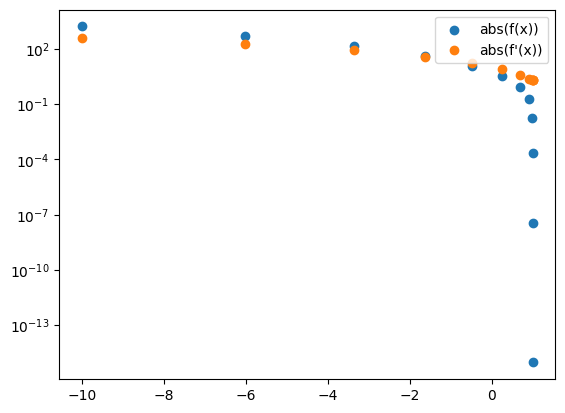

In [97]:
import matplotlib.pyplot as plt

x = np.array(x_vals)
fx = abs(f3(x))
dfx = abs(df3(x))

plt.scatter(x, fx, label='abs(f(x))')
plt.scatter(x, dfx, label = 'abs(f\'(x))')
plt.yscale('log')
plt.legend();

In [96]:
fx

array([-1.71600000e+03, -5.07553519e+02, -1.49789251e+02, -4.39796002e+01,
       -1.27565191e+01, -3.58881168e+00, -9.28730103e-01, -1.86971633e-01,
       -1.75030219e-02, -2.19521692e-04, -3.61211848e-08, -8.88178420e-16])

&#169; Copyright 2025,  Michigan State University Board of Trustees